<a href="https://colab.research.google.com/github/vanecornejo/Investigacion-de-operaciones/blob/main/Modelos%20de%20redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de redes**

In [304]:
#insertamos librería
import networkx as nx

### Gráfica dirigida
Para agregar una gráfica dirigida usamos nx.DiGraph()

In [305]:
G = nx.DiGraph()

### Agregar nodos y arcos
Vamos a agregar los arcos que conectan a los nodos, agregrando ahí mismo los nodos, en este caso los nodos son las letras A, B, C y D.

In [306]:
# Agregar los arcos que conectan a los nodos
G.add_edge("A","B", capacity=1)
G.add_edge("A","C", capacity=1)
G.add_edge("B","D", capacity=1)
G.add_edge("B","C", capacity=1)
G.add_edge("C","D", capacity=1)

### Visualización del gráfico
Mandamos llamar G, para después imprimir la gráfica con nx.draw_network

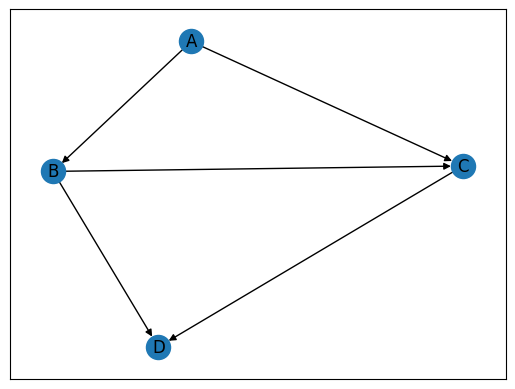

In [307]:
G
nx.draw_networkx(G) #nos muestra la gráfica con los arcos creados

### Propiedades de nodos y arcos
Podemos utilizar diferentes funciones para ver el número de nodos que tiene la red, para mostrarnos cómo van conectados los nodos, el grado de cada nodo.
- **Nodos (nodes):** nodos de la red
- **Número de nodos (number_of_nodes):** cuántos nodos tiene la red
- **Número de arcos (numbe_of_edges):** cuántos arcos tiene la red
- **Conexión de nodos en arcos (edges):** cómo se conectan los nodos en cada arco
- **Grado del nodo (degree):** cuántas conexiones tiene cada nodo


In [308]:
nx.nodes(G) # Regresa los nodos que tiene la red

NodeView(('A', 'B', 'C', 'D'))

In [309]:
nx.number_of_nodes(G) # Regresa el número de nodos que tiene la red

4

In [310]:
nx.number_of_edges(G) # Regresa el número de arcos que tiene la red

5

In [311]:
nx.edges(G) # Nos muestra cómo van conectados los nodos en cada arco

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('C', 'D')])

In [312]:
nx.degree(G) # Muestra el grado de cada nodo, es decir, cuántas conexiones (o arcos) tiene cada nodo

DiDegreeView({'A': 2, 'B': 3, 'C': 3, 'D': 2})

### Medidas de Centralidad
Las medidas de centralidad ayudan a identificar qué nodos son más importantes en la red

- **Grado (degree):** número de conexiones
- **Cercanía (closeness):** qué tan cerca está un nodo del resto
- **Intermediación (betweenness):** cuántos caminos pasan por el nodo


In [313]:
nx.degree_centrality(G) # Centralidad de grado, es decir, número de conexiones

{'A': 0.6666666666666666, 'B': 1.0, 'C': 1.0, 'D': 0.6666666666666666}

In [314]:
nx.closeness_centrality(G) # Centralidad de cercanía

{'A': 0.0, 'B': 0.3333333333333333, 'C': 0.6666666666666666, 'D': 0.75}

In [315]:
nx.betweenness_centrality(G) # Centralidad de intermediación

{'A': 0.0, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.0}

### Caminos más cortos
También podemos encontrar el camino más corto entre dos nodos. El camino más corto entre dos nodos es la ruta con menos arcos que los conecta.

- nx.shortest_path(G, source, target) → devuelve el camino.  
- nx.shortest_path_length(G, source, target) → devuelve la longitud.


In [316]:
# Por ejemplo
camino = nx.shortest_path(G, source="A", target="D")
longitud = nx.shortest_path_length(G, source="A", target="D")

print("Camino más corto entre A y D:", camino)
print("Longitud del camino:", longitud)


Camino más corto entre A y D: ['A', 'B', 'D']
Longitud del camino: 2


## **Árbol de expansión mínima**

El árbol de expansión mínima es un árbol que enlaza todos los nodos de la red sin permitir ciclos. Buscamos determinar la red de menor longitud.

Se define una función con parámetros G y weight:
*    *Grafo* : grafo no dirigido con atributos de peso en las arista
*    *weight* : nombre del atributo de peso en las aristas

Utilizamos *nx.minimum_spanning_tree* de la librería networkx para que nos devuelva el árbol de expansión mínima del grafo como un nuevo grafo.


In [317]:
def arbol_expansion(Grafo, weight='weight'):
    T = nx.minimum_spanning_tree(Grafo, weight=weight)
    return T

**Ejemplo del árbol de expansión mínima:**

Una compañía de TV quiere proporcionar servicio de cable a 5 nuevas áreas habitacionales, la figura muestra las conexiones posibles. La distancia está en millas. Dterminar la red de menor costo.:

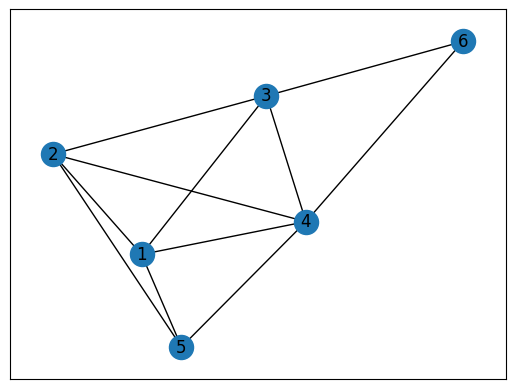

In [318]:
# Crear un grafo de ejemplo
Grafo = nx.Graph()
Grafo.add_edge('1', '2', capacity=1, weight=1)
Grafo.add_edge('1', '3', capacity=1, weight=5)
Grafo.add_edge('1', '5', capacity=1, weight=9)
Grafo.add_edge('1', '4', capacity=1, weight=7)
Grafo.add_edge('2', '4', capacity=1, weight=4)
Grafo.add_edge('2', '3', capacity=1, weight=6)
Grafo.add_edge('2', '5', capacity=1, weight=3)
Grafo.add_edge('3', '4', capacity=1, weight=5)
Grafo.add_edge('3', '6', capacity=1, weight=10)
Grafo.add_edge('4', '5', capacity=1, weight=8)
Grafo.add_edge('4', '6', capacity=1, weight=3)

Grafo
nx.draw_networkx(Grafo)


In [319]:
# Nos muestra la solución, la longitud de cada nodo elegido y la suma total, es decir, la distancia.

T = arbol_expansion(Grafo)
print("SOLUCIÓN. La red de menor costo es:\n")
for u, v, data in T.edges(data=True):
    print(u, "->", v, "longitud de:", data.get('weight'))
suma = sum(data.get('weight') for u, v, data in T.edges(data=True))
print("\nLa distancia total es: ", suma, "millas")

SOLUCIÓN. La red de menor costo es:

1 -> 2 longitud de: 1
1 -> 3 longitud de: 5
2 -> 5 longitud de: 3
2 -> 4 longitud de: 4
4 -> 6 longitud de: 3

La distancia total es:  16 millas


## **La ruta más corta**

Devuelve la ruta más corta entre source y target en G, y su longitud.

Parámetros:
*   G2: grafo (dirigido o no dirigido), con atributos de peso en las aristas.
*   source: nodo origen
*   target: nodo destino
*   weight: nombre del atributo de peso en las aristas

 Retorna:
*   path: lista de nodos que representan la ruta más corta
*   distance: longitud total de la ruta (suma de los pesos)

In [320]:
def ruta_mas_corta(G2, source, target, weight='weight'):
    distance = nx.dijkstra_path_length(G2, source, target, weight=weight)
    path = nx.dijkstra_path(G2, source, target, weight=weight)
    return path, distance

**Ejemplo**


La red nos muestra rutas entre la ciudad 1 y otras 4 ciudades. Determinar la ruta más corta, entre 1 y 5.

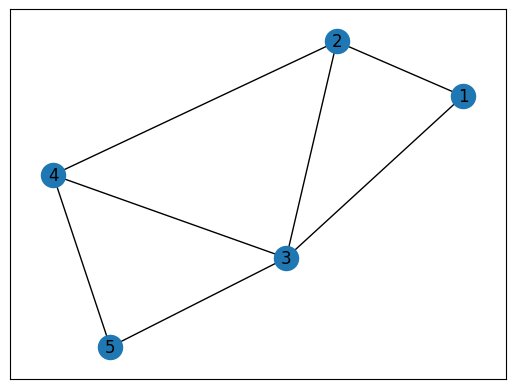

In [321]:
# Crear un grafo de ejemplo
G2 = nx.Graph()
G2.add_edge('1', '2', capacity=1, weight=100)
G2.add_edge('1', '3', capacity=1, weight=30)
G2.add_edge('2', '3', capacity=1, weight=20)
G2.add_edge('2', '4', capacity=1, weight=15)
G2.add_edge('3', '4', capacity=1, weight=10)
G2.add_edge('3', '5', capacity=1, weight=60)
G2.add_edge('4', '5', capacity=1, weight=50)

G2
nx.draw_networkx(G2)

In [322]:
# Queremos la ruta más corta de '1' y cada una de las otras ciudades
path, dist = ruta_mas_corta(G2, '1', '5')
print("Ruta más corta de 1 a 5:", path)
print("Distancia:", dist)

Ruta más corta de 1 a 5: ['1', '3', '5']
Distancia: 90


## **Flujo máximo**

Calcula el flujo máximo entre source y sink en un grafo dirigido G.

Parámetros:
*   G: grafo dirigido (nx.DiGraph) con atributo de capacidad en las aristas.
*   source: nodo fuente
*   sink: nodo sumidero
*   capacity: nombre del atributo de capacidad (por defecto 'capacity')

Retorna:
*   flow_value: valor numérico del flujo máximo
*   flow_dict: diccionario con el flujo asignado a cada arista (estructura tipo {u: {v: flujo_uv, ...}, ...})


In [323]:
def flujo_maximo(Gf, source, sink, capacity='capacity'):
    flow_value, flow_dict = nx.maximum_flow(Gf, source, sink, capacity=capacity)
    return flow_value, flow_dict

**Ejemplo**

Hallar el flujo máximo de A a F.

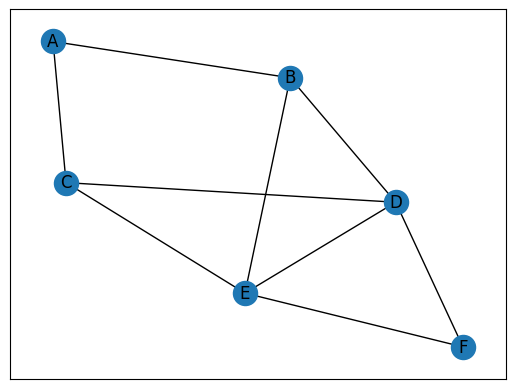

In [324]:
# Crear un grafo de ejemplo
Gf = nx.Graph()
Gf.add_edge('A', 'B', capacity=1, weight=9)
Gf.add_edge('A', 'C', capacity=1, weight=7)
Gf.add_edge('B', 'D', capacity=1, weight=7)
Gf.add_edge('B', 'E', capacity=1, weight=2)
Gf.add_edge('C', 'D', capacity=1, weight=4)
Gf.add_edge('C', 'E', capacity=1, weight=6)
Gf.add_edge('D', 'E', capacity=1, weight=3)
Gf.add_edge('D', 'F', capacity=1, weight=6)
Gf.add_edge('E', 'F', capacity=1, weight=9)


Gf
nx.draw_networkx(Gf)

In [326]:
flow_value, flow_dict = flujo_maximo(Gf, 'A', 'F')
print("Flujo máximo:", flow_value)
print("\nDistribución del flujo:")
for u, vs in flow_dict.items():
    for v, f in vs.items():
        if f > 0:
            print(f"{u} -> {v} : {f}")

Flujo máximo: 2

Distribución del flujo:
A -> B : 1
A -> C : 1
B -> D : 1
C -> D : 1
D -> E : 1
D -> F : 1
E -> F : 1
